In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from datetime import datetime

def read_file(subject_id):
    subject_data = {}
    with pd.HDFStore('./data/subject_{}.h5'.format(subject_id)) as hdfs:
        subject_data.update({'Acceleration':np.array(hdfs['Acceleration'].value)})
        subject_data.update({'Acceleration_Index':np.array(hdfs['Acceleration'].index)})
        subject_data.update({'Heart_Rate':np.array(hdfs['Heart_Rate']['value'])})
        subject_data.update({'Heart_Rate_Confidence':np.array(hdfs['Heart_Rate']['conf'])})
        subject_data.update({'Heart_Rate_Index':np.array(hdfs['Heart_Rate'].index)})
        subject_data.update({'Breathing_Rate':np.array(hdfs['Breathing_Rate']['value'])})
        subject_data.update({'Breathing_Rate_Confidence':np.array(hdfs['Breathing_Rate']['conf'])})
        subject_data.update({'Breathing_Rate_Index':np.array(hdfs['Breathing_Rate'].index)})
        subject_data.update({'RR_Interval':np.array(hdfs['RR_Interval']['value'])})
        subject_data.update({'RR_Interval_Confidence':np.array(hdfs['RR_Interval']['conf'])})
        subject_data.update({'RR_Interval_Index':np.array(hdfs['RR_Interval'].index)})
        subject_data.update({'Sleep_Stages':np.array(hdfs['Sleep_Stages'].value)})
        subject_data.update({'Sleep_Stages_Index':np.array(hdfs['Sleep_Stages'].index)})
        subject_data.update({'Profile_Age':hdfs['Profile']['age'].tolist()[0]})
        subject_data.update({'Profile_Gender':hdfs['Profile']['gender'].tolist()[0]})
        subject_data.update({'Profile_Weight':hdfs['Profile']['weight'].tolist()[0]})
        subject_data.update({'Profile_Height':hdfs['Profile']['height'].tolist()[0]})
        subject_data.update({'Profile_Blood_Pressure_Systolic':hdfs['Profile']['blood_pressure_systolic'].tolist()[0]})
        subject_data.update({'Profile_Blood_Pressure_Diastolic':hdfs['Profile']['blood_pressure_diastolic'].tolist()[0]})
        subject_data.update({'Profile_Cholesterol':hdfs['Profile']['cholesterol'].tolist()[0]})
        subject_data.update({'Profile_Smoker':hdfs['Profile']['smoker'].tolist()[0]})
        
    return(subject_data)

In [2]:
all_subject_data = {}
for i in range(10):
    all_subject_data.update({'subject{}'.format(i):read_file(i)})

In [3]:
import matplotlib.pyplot as plt
subject_data = all_subject_data['subject2']

In [4]:
print "Age: " + str(subject_data['Profile_Age'])
print "Gender : " + str(subject_data['Profile_Gender'])
print "Weight : " + str(subject_data['Profile_Weight'])
print "Height : " + str(subject_data['Profile_Height'])
print "Cholesterol : " + str(subject_data['Profile_Cholesterol'])
print "Blood Pressure Systolic : " + str(subject_data['Profile_Blood_Pressure_Systolic'])
print "Blood Pressure Diastolic : " + str(subject_data['Profile_Blood_Pressure_Diastolic'])
print "Smoker : " + str(subject_data['Profile_Smoker'])

Age: 43
Gender : Female
Weight : 115.0
Height : 172.0
Cholesterol : 4.0
Blood Pressure Systolic : 150
Blood Pressure Diastolic : 110
Smoker : No


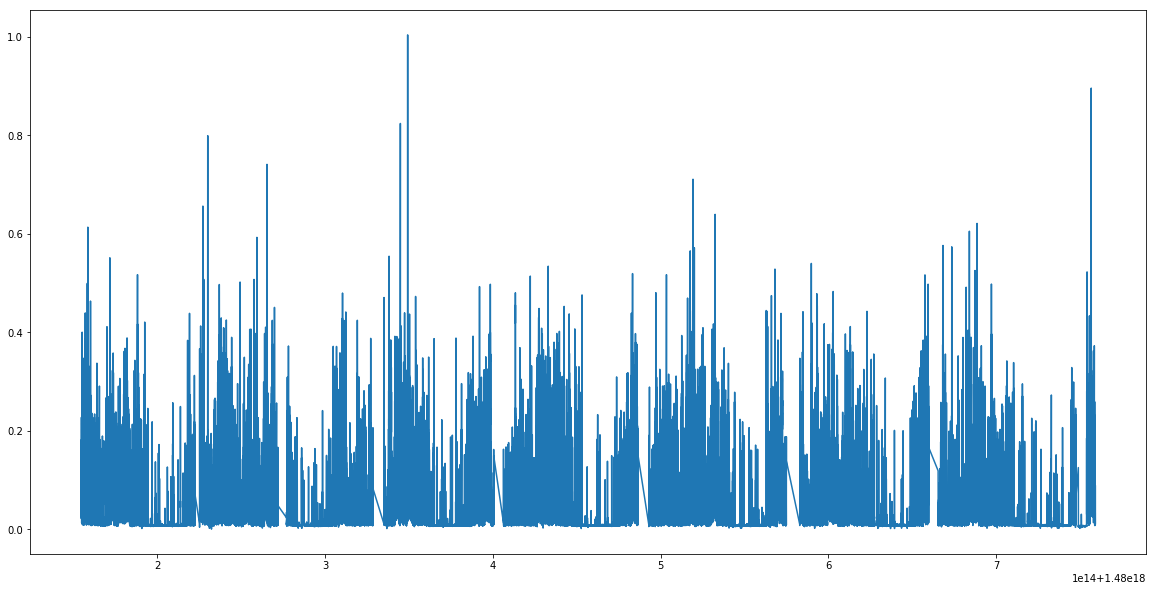

In [5]:
plt.figure(figsize=(20,10))
plt.plot(subject_data['Acceleration_Index'], subject_data['Acceleration'])
plt.show()

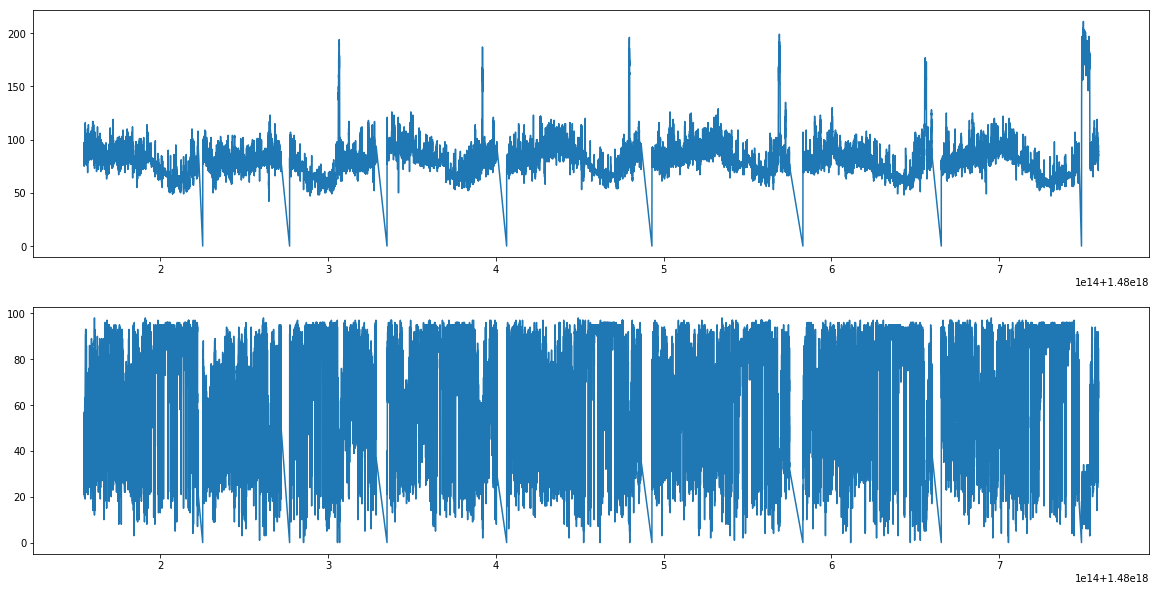

In [6]:
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(subject_data['Heart_Rate_Index'], subject_data['Heart_Rate'])
plt.subplot(212)
plt.plot(subject_data['Heart_Rate_Index'], subject_data['Heart_Rate_Confidence'])
plt.show()

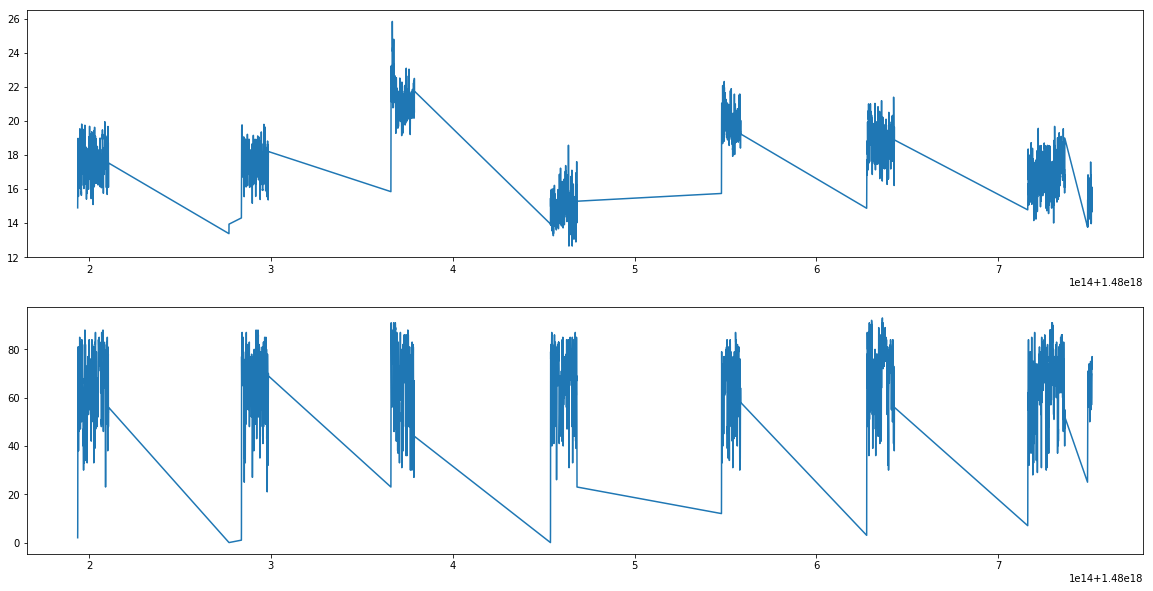

In [7]:
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(subject_data['Breathing_Rate_Index'], subject_data['Breathing_Rate'])
plt.subplot(212)
plt.plot(subject_data['Breathing_Rate_Index'], subject_data['Breathing_Rate_Confidence'])
plt.show()

In [8]:
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(subject_data['RR_Interval_Index'], subject_data['RR_Interval'])
plt.subplot(212)
plt.plot(subject_data['RR_Interval_Index'], subject_data['RR_Interval_Confidence'])
plt.show()

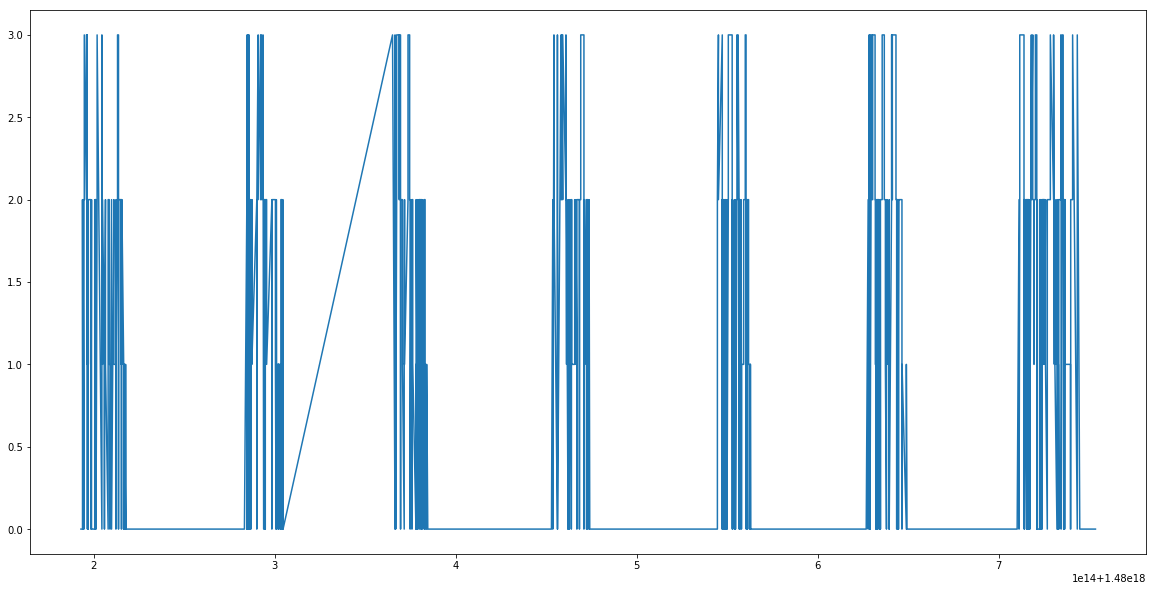

In [9]:
tmp_sleep_stages = subject_data['Sleep_Stages']
tmp_sleep_stages[tmp_sleep_stages == 'sleep_wake_start'] = 0
tmp_sleep_stages[tmp_sleep_stages == 'sleep_wake_stop'] = 0
tmp_sleep_stages[tmp_sleep_stages == 'sleep_rem_start'] = 1
tmp_sleep_stages[tmp_sleep_stages == 'sleep_rem_stop'] = 1
tmp_sleep_stages[tmp_sleep_stages == 'sleep_light_start'] = 2
tmp_sleep_stages[tmp_sleep_stages == 'sleep_light_stop'] = 2
tmp_sleep_stages[tmp_sleep_stages == 'sleep_deep_start'] = 3
tmp_sleep_stages[tmp_sleep_stages == 'sleep_deep_stop'] = 3
plt.figure(figsize=(20,10))
plt.plot(subject_data['Sleep_Stages_Index'], tmp_sleep_stages)
plt.show()

# Data Exploration

In [10]:
all_subject_data = {}
for i in range(10):
    all_subject_data.update({'subject{}'.format(i):read_file(i)})

subject0 42 DescribeResult(nobs=558956L, minmax=(0.0017902131658047438, 1.4779466390609741), mean=0.052680839005481095, variance=0.009381018576776744, skewness=6.030749245857448, kurtosis=55.86166730357769)
subject1 34 DescribeResult(nobs=564154L, minmax=(0.0014400678919628263, 0.8887552618980408), mean=0.03764014426134933, variance=0.0024481258527441394, skewness=2.627202585522637, kurtosis=10.41068499146984)
subject2 43 DescribeResult(nobs=563468L, minmax=(0.000823116977699101, 1.0035028457641602), mean=0.049553282529782354, variance=0.0038262719995364996, skewness=2.1103220445777087, kurtosis=6.121863263937685)
subject3 34 DescribeResult(nobs=512550L, minmax=(0.0013202582485973835, 0.6579679846763611), mean=0.041223737060654034, variance=0.0029060286292797617, skewness=2.070501990529641, kurtosis=4.623117113724053)
subject4 31 DescribeResult(nobs=563333L, minmax=(0.0020104534924030304, 1.0746887922286987), mean=0.04410056004359571, variance=0.003353356890809636, skewness=2.627898608

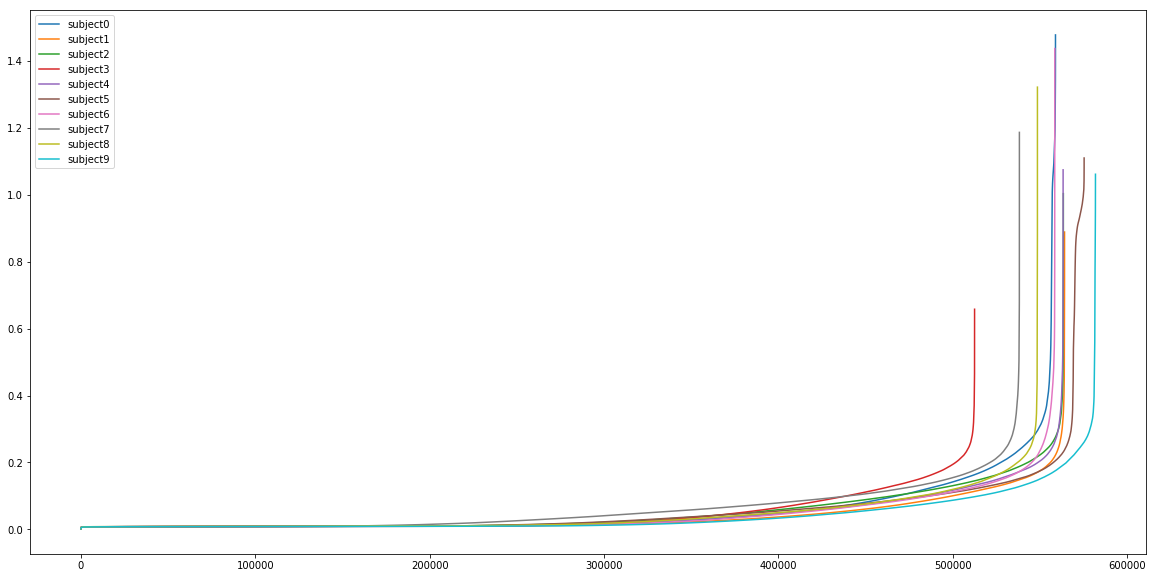

In [11]:
plt.figure(figsize=(20,10))
for i in range(len(all_subject_data.keys())):
    subject_data=all_subject_data['subject{}'.format(i)]
    data=[]
    columns=[]
    Acceleration_dict={}
    Acceleration_dict['Rate']=subject_data['Acceleration']
    Acceleration_dict['Index']=subject_data['Acceleration_Index']
    Acceleration_dict['Confidence']=subject_data['Heart_Rate_Confidence']
#     Acceleration_dict['subject{}'.format(i)]=subject_data['Heart_Rate']
    plt.plot(np.sort(subject_data['Acceleration']), label='subject{}'.format(i))
    print 'subject{}'.format(i),subject_data['Profile_Age'],stats.describe(subject_data['Acceleration'])
plt.legend()
plt.show()

In the descriptive statistics above along with the graph, one can see that some individuals do more exercise than others. It might be valuable to quantify this if users were using the same devices. As I can't make that assumption I have chose to rather look into detecting exercise/movement by looking into the acceleration in conjunction with heart rate.

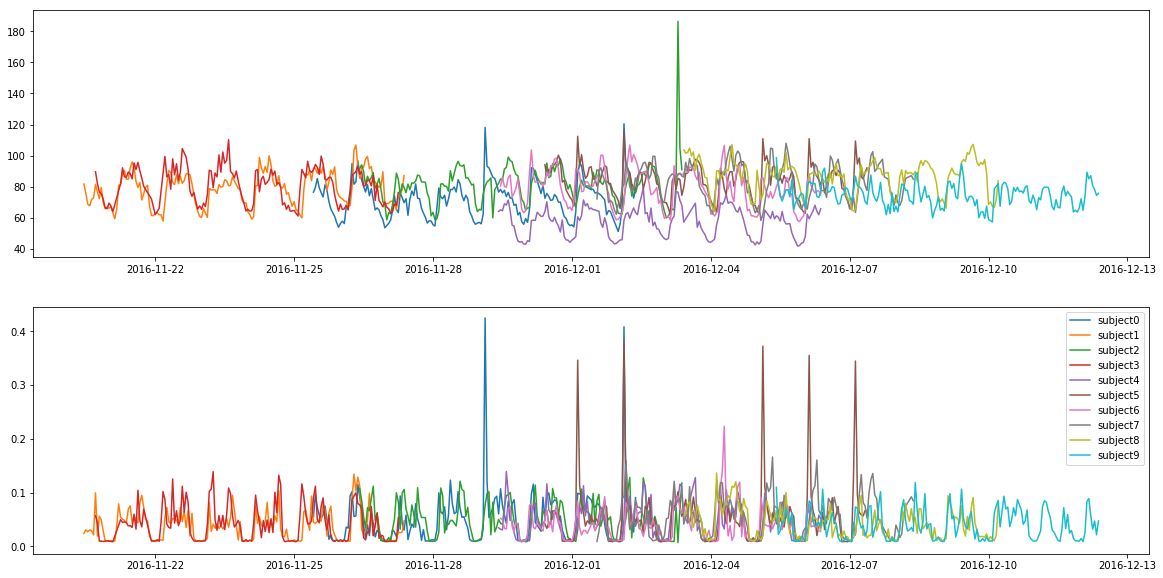

In [26]:
# Heart Rate DF
plt.figure(figsize=(20,10))
for j in range(10):
    hr_dict={}
    subject_data=all_subject_data['subject{}'.format(j)]
    hr_dict['Rate']=subject_data['Heart_Rate']
    hr_dict['Index']=subject_data['Heart_Rate_Index']
    hr_dict['Confidence']=subject_data['Heart_Rate_Confidence']
    hr_df=pd.DataFrame.from_dict(hr_dict)
    max_hr=max(hr_df.Rate)*0.55
    hr_df_ar=hr_df.loc[((hr_df.Confidence>=30)&(hr_df.Rate>=max_hr))|
                       ((hr_df.Rate<max_hr)&(hr_df.Confidence>=20))]

    # Acceleration DF
    acc_dict={}
    subject_data=all_subject_data['subject{}'.format(j)]
    acc_dict['Acceleration']=subject_data['Acceleration']
    acc_dict['Index']=subject_data['Acceleration_Index']
    acc_df=pd.DataFrame.from_dict(acc_dict)

    hr_df_ar.loc[:,'Index']=hr_df_ar.Index.apply(lambda x: datetime.utcfromtimestamp(x // 1000000000))
    acc_df.loc[:,'Index']=acc_df.Index.apply(lambda x: datetime.utcfromtimestamp(x // 1000000000))

    merged_df=hr_df_ar.merge(acc_df, how='inner',on='Index')

    grouped_df_pm=merged_df.groupby([merged_df.Index.map(lambda x : x.replace(second=0))])
    exercise_pm=grouped_df_pm.agg({'Rate':np.mean,'Acceleration':np.mean}).reset_index()

    grouped_df_ph=exercise_pm.groupby([exercise_pm.Index.map(lambda x :x.replace(minute=0))])
    exercise_ph=grouped_df_ph.agg({'Rate':np.mean,'Acceleration':np.mean}).reset_index()

    plt.subplot(211)
    plt.plot(exercise_ph['Index'], exercise_ph['Rate'], label='subject{}'.format(j))
    plt.subplot(212)
    plt.plot(exercise_ph['Index'], exercise_ph['Acceleration'], label='subject{}'.format(j))

plt.legend()
plt.show()

In the figures above one can see the average heart rate per hour as well as the average acceleration per hour. I intended to build an exercise detection algorithm to track each individuals' exercise. On the graph, one can see some jumps in acceleration at the same time as heart rate jumps. This would be a good indication that exercise has taken place. 

I have decided to exclude exercise from this analysis, but I think it might be a very good feature to use in the future.

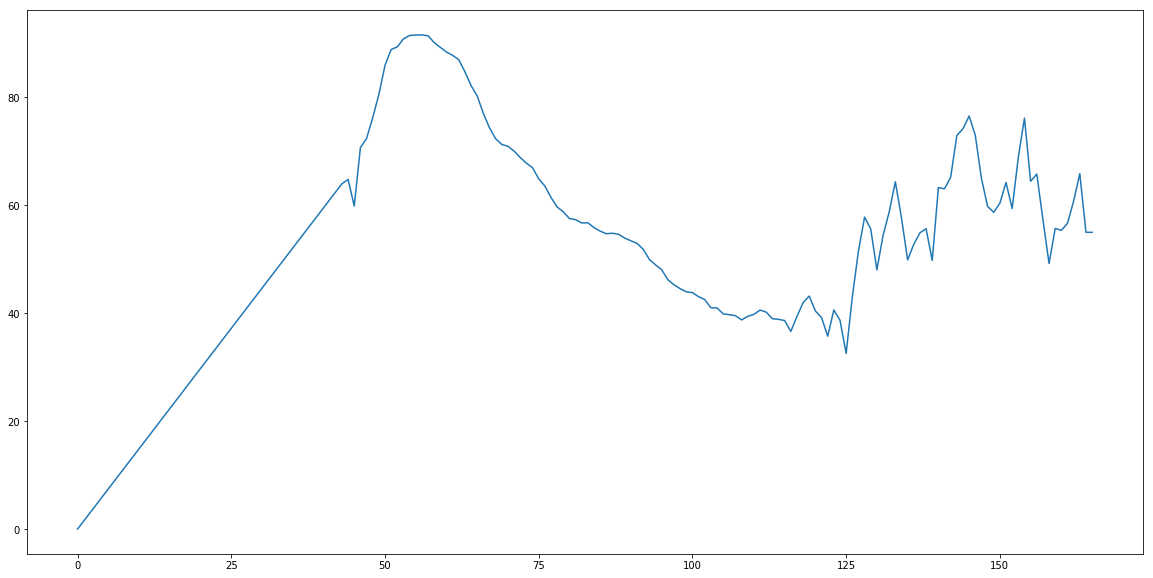

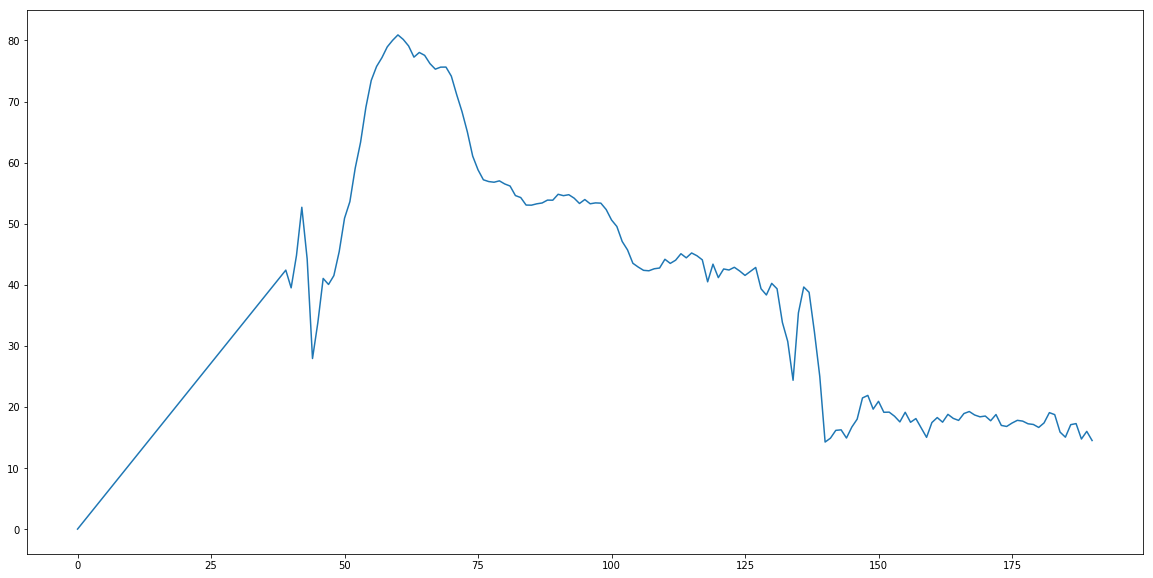

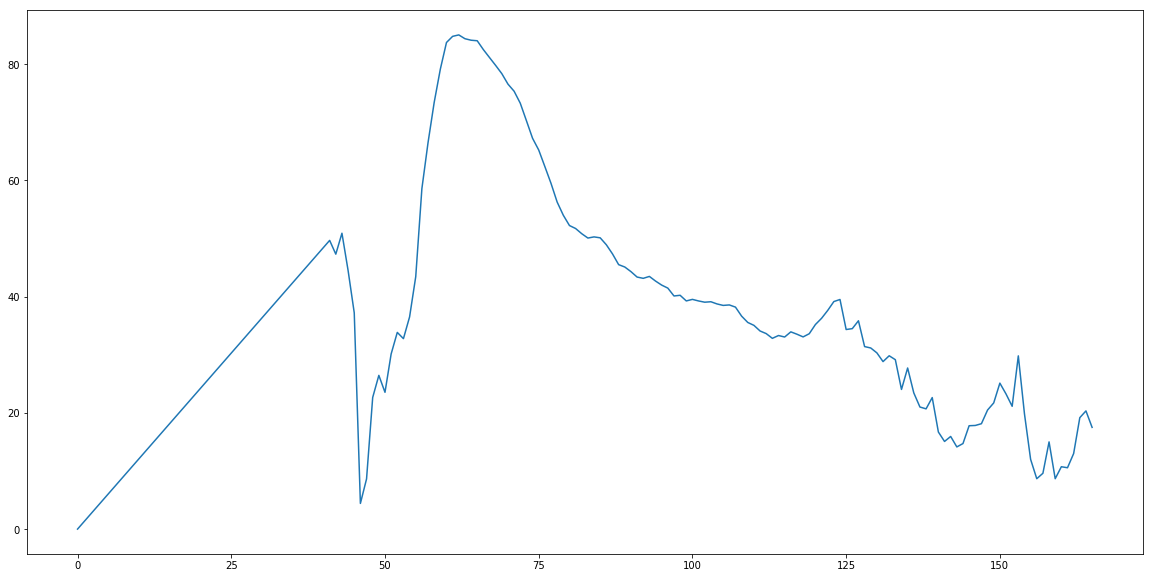

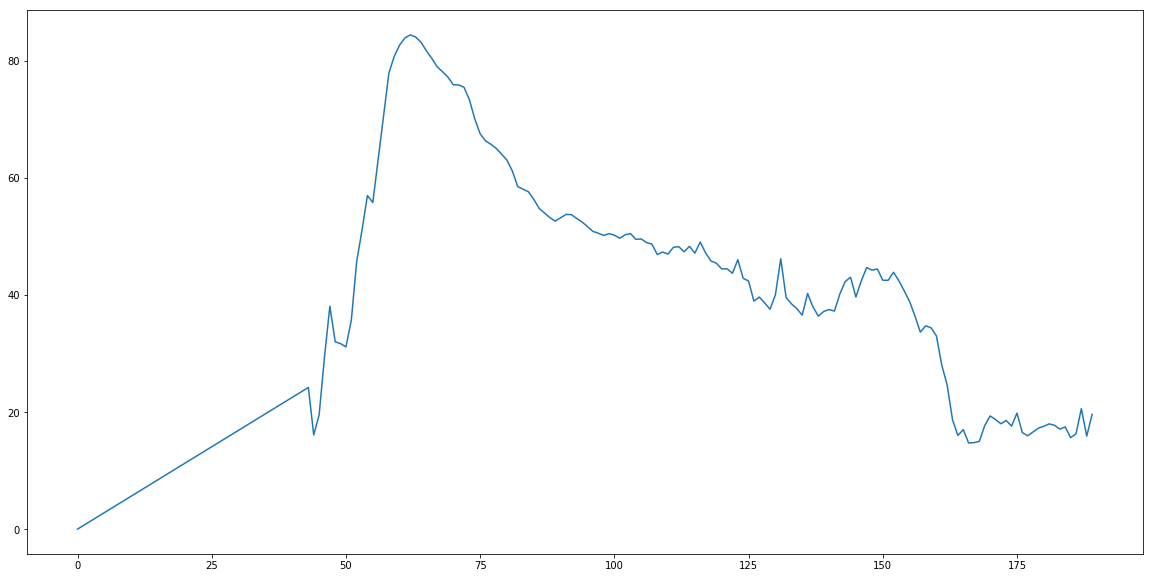

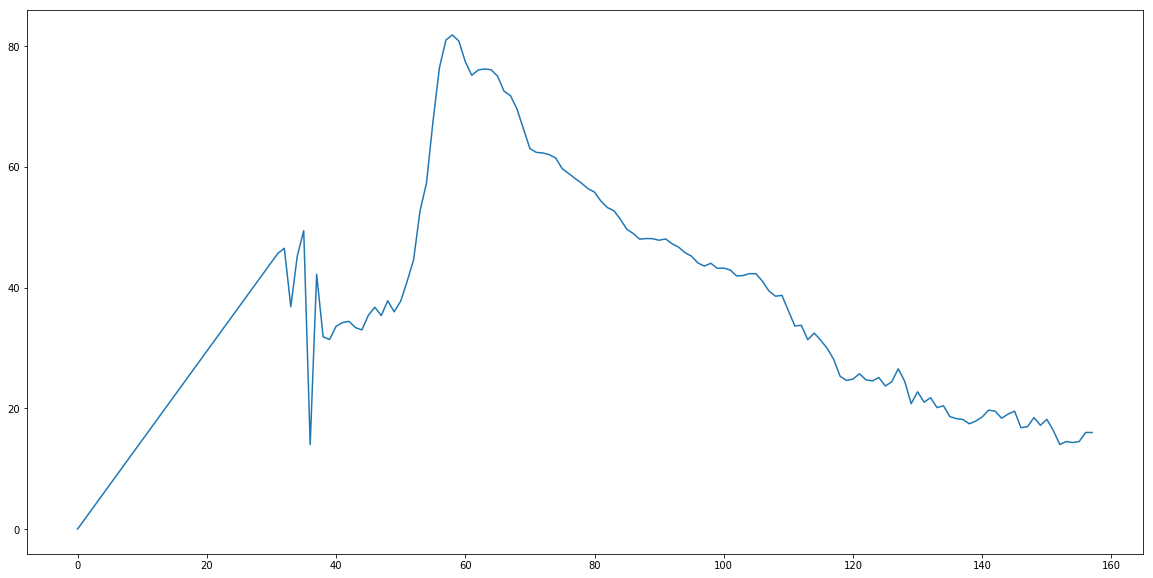

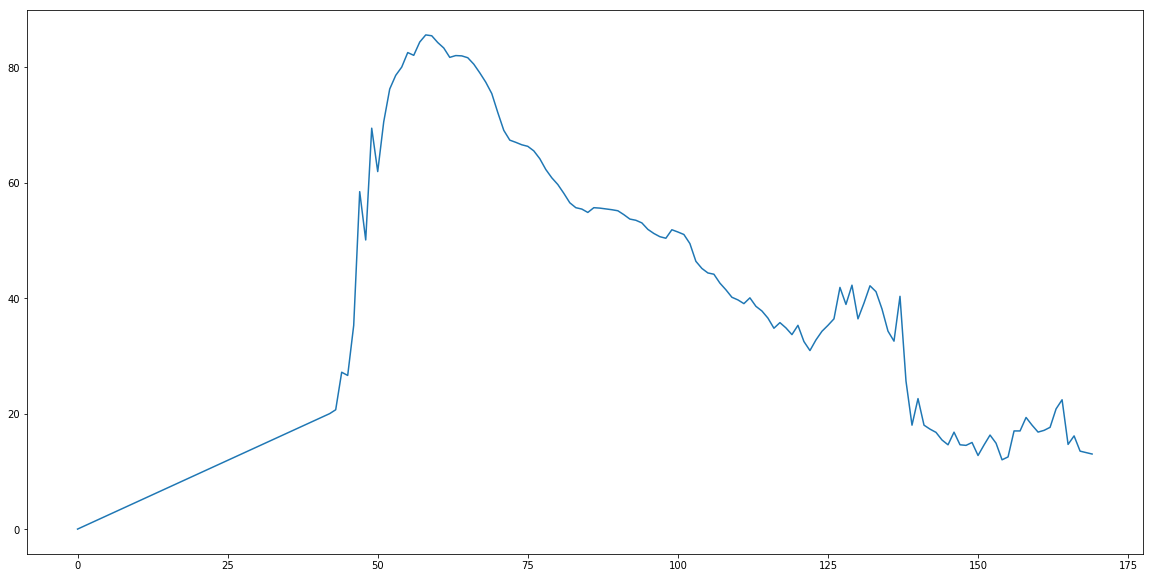

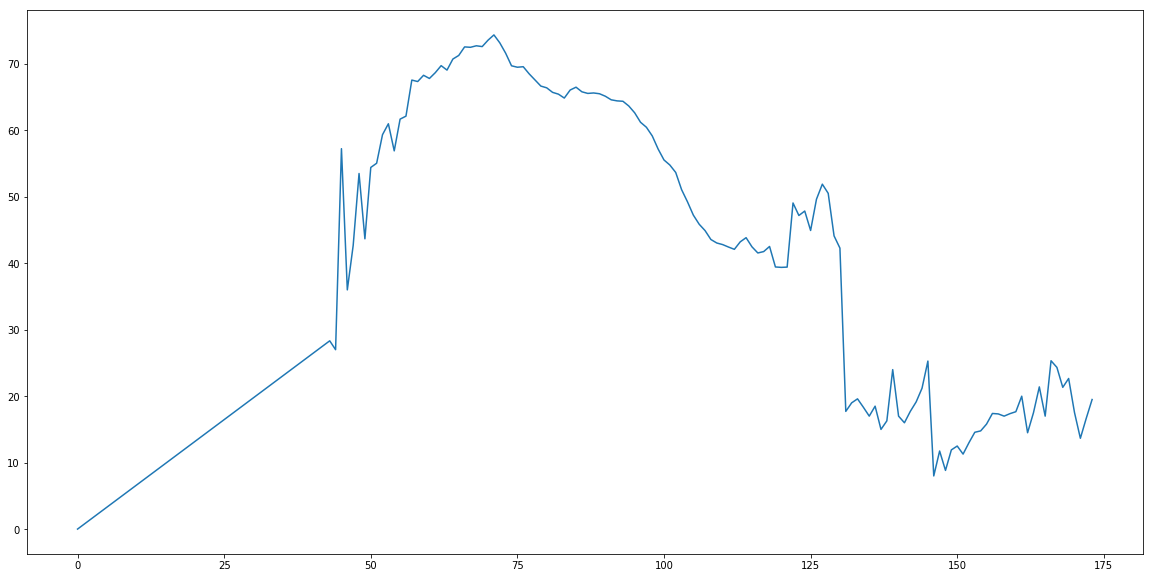

In [13]:
for j in range(10):
    hr_dict={}
    subject_data=all_subject_data['subject{}'.format(j)]
    hr_dict['Rate']=subject_data['Heart_Rate']
    hr_dict['Index']=subject_data['Heart_Rate_Index']
    hr_dict['Confidence']=subject_data['Heart_Rate_Confidence']
    hr_df=pd.DataFrame.from_dict(hr_dict)
    grouped_df=hr_df.groupby('Rate').agg({'Confidence':np.mean}).reset_index()
    plt.figure(figsize=(20,10))
    plt.plot(grouped_df['Rate'], grouped_df['Confidence'])
    plt.show()

In each of the examples above, one can see that with an increase in heart rate the confidence in heart rate decreases. Therefore the higher a users heart rate becomes the more difficult it is for the wearable device to estimate the exact hear rate.

# Feature Engineering

## Sleep

In [14]:
def minsdiff(x,y):
    '''
    Input: Start and End times where is difference is needed
    Output: Time difference in minutes
    '''
    return (x-y)/6e+10

In [15]:
sleep_data={'Average_Hours':[],'Average_Rem':[],'Average_Deep':[]}
for j in range(10):
    # Reading subjcet spesific data
    subject_data=all_subject_data['subject{}'.format(j)]
    ss_dict={}
    ss_dict['Stage']=subject_data['Sleep_Stages']
    ss_dict['Index']=subject_data['Sleep_Stages_Index']
    ss_df=pd.DataFrame.from_dict(ss_dict)
    
    # Assigning each sleep stage to a number 
    # (I chose to only look at the stop condition as it is enough to esimate time in spesific stage)
    ss_df.loc[ss_df.Stage=='sleep_wake_stop','tmp_sleep_stages']=0
    ss_df.loc[ss_df.Stage=='sleep_rem_stop','tmp_sleep_stages']=1
    ss_df.loc[ss_df.Stage=='sleep_light_stop','tmp_sleep_stages']=2
    ss_df.loc[ss_df.Stage=='sleep_deep_stop','tmp_sleep_stages']=3
    ss_df_new=ss_df.loc[~ss_df.tmp_sleep_stages.isna()].reset_index()

    # Calculating time in each stage
    for i in range(1,ss_df_new.shape[0]):
        ss_df_new.loc[ss_df_new.index==i,'MinsDiff']=minsdiff(list(ss_df_new.Index)[i],list(ss_df_new.Index)[i-1])
    
    # Grouping stages to get the average time in each stage per day
    sleep_stage_df=ss_df_new.loc[ss_df_new.MinsDiff!=0].groupby('tmp_sleep_stages').agg({'MinsDiff':sum}).reset_index()
    sleep_stage_df['Hours_Per_Day']=sleep_stage_df.MinsDiff.apply(lambda x:(x/60)/7)
    Average_Hours=sum(sleep_stage_df.loc[sleep_stage_df.tmp_sleep_stages!=0].Hours_Per_Day)
    Average_Rem=sum(sleep_stage_df.loc[sleep_stage_df.tmp_sleep_stages==1].Hours_Per_Day)/Average_Hours
    Average_Deep=sum(sleep_stage_df.loc[sleep_stage_df.tmp_sleep_stages==3].Hours_Per_Day)/Average_Hours
    sleep_data['Average_Hours'].append(Average_Hours)
    sleep_data['Average_Rem'].append(Average_Rem)
    sleep_data['Average_Deep'].append(Average_Deep)

sleep_data_df=pd.DataFrame.from_dict(sleep_data)

In [16]:
sleep_data_df

Average_Deep  Average_Hours  Average_Rem
0      0.566291      11.522979     0.161995
1      0.369855       9.510278     0.296296
2      0.478224       8.152103     0.162681
3      0.117316       9.853294     0.188238
4      0.155223       6.519048     0.269905
5      0.203780       6.677381     0.295240
6      0.350135      10.961071     0.151619
7      0.115593       8.960000     0.368481
8      0.524214       6.535557     0.197819
9      0.187925       7.057024     0.202264

# Resting heart rate

I have decided to take an average of the heart rate where the confidence is above 50 and the heart rate is lower than the minimum recommended exercise heart rate. I calculated the minimum exercise heart rate by taking 55% of the subjects maximum heart rate.

In [17]:
hr=[]
for j in range(10):
    hr_dict={}
    subject_data=all_subject_data['subject{}'.format(j)]
    hr_dict['Rate']=subject_data['Heart_Rate']
    hr_dict['Index']=subject_data['Heart_Rate_Index']
    hr_dict['Confidence']=subject_data['Heart_Rate_Confidence']
    hr_df=pd.DataFrame.from_dict(hr_dict)
    exercise_hr=max(hr_df.Rate)*0.55
    hr_df_ar=hr_df.loc[(hr_df.Rate<exercise_hr)&(hr_df.Confidence>=50)]
    hr.append(np.mean(hr_df_ar.Rate))

Resting_HR=pd.DataFrame(data=hr,columns=['Resting_HR'])
Resting_HR

Resting_HR
0   66.771658
1   74.953343
2   77.300719
3   71.223105
4   51.317069
5   79.648604
6   69.671594
7   75.516119
8   81.953886
9   70.302665

# Breathing rate


In [18]:
avg_loss={'confidence':[],'loss':[],'avg_hr':[]}
for j in range(20,100,5):
    data_loss=[]
    br=[]
    for i in range(10):
        br_dict={}
        subject_data=all_subject_data['subject{}'.format(i)]
        br_dict['Rate']=subject_data['Breathing_Rate']
        br_dict['Index']=subject_data['Breathing_Rate_Index']
        br_dict['Confidence']=subject_data['Breathing_Rate_Confidence']
        br_df=pd.DataFrame.from_dict(br_dict)
        max_rows=br_df.shape[0]
        br_df_ar=br_df.loc[br_df.Confidence>=j]
        afterRemoval=br_df_ar.shape[0]
        data_loss.append(afterRemoval/float(max_rows))
        br.append(np.mean(br_df_ar['Rate']))
    avg_loss['confidence'].append(j)
    avg_loss['loss'].append(np.mean(data_loss)*100)
    avg_loss['avg_hr'].append(np.mean(br))

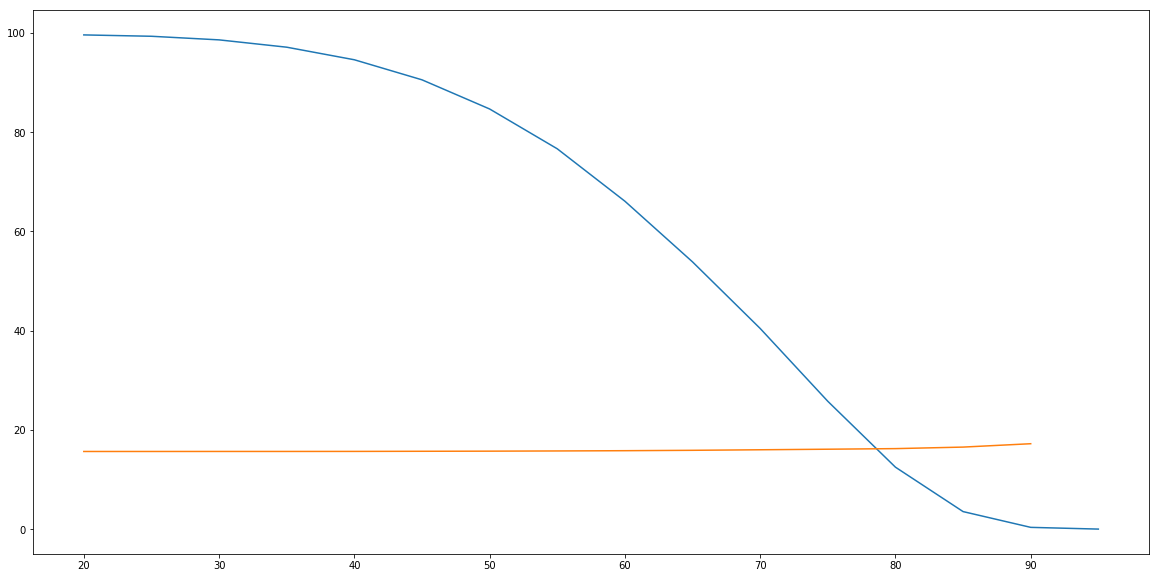

In [19]:
plt.figure(figsize=(20,10))
plt.plot(avg_loss['confidence'],avg_loss['loss'])
plt.plot(avg_loss['confidence'],avg_loss['avg_hr'])
plt.show()

Once again I looked into the data loss compared to the minimum confidence level. I chose 50 as my minimum confidence level as it didn't have a big impact on the overall average of the data and loses less than 20% data.

In [20]:
br=[]
for i in range(10):
    # Reading in data
    br_dict={}
    subject_data=all_subject_data['subject{}'.format(i)]
    br_dict['Rate']=subject_data['Breathing_Rate']
    br_dict['Index']=subject_data['Breathing_Rate_Index']
    br_dict['Confidence']=subject_data['Breathing_Rate_Confidence']
    br_df=pd.DataFrame.from_dict(br_dict)
    
    # Filtering out data with a confidence less than 50
    br_df_ar=br_df.loc[br_df.Confidence>=50]
    
    # Calculating the mean of the Breathing rate
    br.append(np.mean(br_df_ar['Rate']))

Breathing_Rate=pd.DataFrame(data=br,columns=['Breathing_Rate'])

In [21]:
Breathing_Rate

Breathing_Rate
0       16.021316
1       17.703587
2       17.862957
3       14.738812
4       13.451964
5       15.027902
6       15.466550
7       14.113023
8       17.449852
9       15.237295

# Summary Dataset

In [22]:
Profile_Info={'Profile_Gender':[],'Profile_Blood_Pressure_Diastolic':[],'Profile_Cholesterol':[],
              'Profile_Blood_Pressure_Systolic':[],'Profile_Height':[],'Profile_Weight':[],
              'Profile_Age':[],'Profile_Smoker':[],'BMI':[]}

for j in range(10):
    subject_data=all_subject_data['subject{}'.format(j)]
    Profile_Info['Profile_Gender'].append(subject_data['Profile_Gender'])
    Profile_Info['Profile_Blood_Pressure_Diastolic'].append(subject_data['Profile_Blood_Pressure_Diastolic'])
    Profile_Info['Profile_Blood_Pressure_Systolic'].append(subject_data['Profile_Blood_Pressure_Systolic'])
    Profile_Info['Profile_Cholesterol'].append(subject_data['Profile_Cholesterol'])
    Profile_Info['Profile_Height'].append(subject_data['Profile_Height'])
    Profile_Info['Profile_Weight'].append(subject_data['Profile_Weight'])
    Profile_Info['Profile_Age'].append(subject_data['Profile_Age'])
    Profile_Info['Profile_Smoker'].append(subject_data['Profile_Smoker'])
    Profile_Info['BMI'].append(10000*subject_data['Profile_Weight']/subject_data['Profile_Height']**2)
    

Profile_DF=pd.DataFrame.from_dict(Profile_Info)

In [23]:
Profile_DF=Profile_DF.join(sleep_data_df, how='inner')
Profile_DF=Profile_DF.join(Resting_HR, how='inner')
Profile_DF=Profile_DF.join(Breathing_Rate, how='inner')
Profile_DF

BMI  Profile_Age  Profile_Blood_Pressure_Diastolic  \
0  23.665244           42                                78   
1  33.637153           34                                87   
2  38.872363           43                               110   
3  21.333333           34                                60   
4  22.598140           31                                76   
5  20.700817           45                                70   
6  16.298186           34                                80   
7  46.395657           49                               110   
8  41.821416           49                                80   
9  23.510204           48                                70   

   Profile_Blood_Pressure_Systolic  Profile_Cholesterol Profile_Gender  \
0                              120                 2.70         Female   
1                              134                 4.44         Female   
2                              150                 4.00         Female   
3                              100                 3.82           Male   
4                              128                 2.77         Female   
5                              110                 3.47           Male   
6                              120                 4.32         Female   
7                              180                 4.10         Female   
8                              140                 3.18         Female   
9                              120                 7.43         Female   

   Profile_Height Profile_Smoker  Profile_Weight  Average_Deep  Average_Hours  \
0           167.0            Yes            66.0      0.566291      11.522979   
1           192.0             No           124.0      0.369855       9.510278   
2           172.0             No           115.0      0.478224       8.152103   
3           150.0            Yes            48.0      0.117316       9.853294   
4           176.0             No            70.0      0.155223       6.519048   
5           163.0            Yes            55.0      0.203780       6.677381   
6           168.0             No            46.0      0.350135      10.961071   
7           178.0             No           147.0      0.115593       8.960000   
8           179.0            Yes           134.0      0.524214       6.535557   
9           175.0             No            72.0      0.187925       7.057024   

   Average_Rem  Resting_HR  Breathing_Rate  
0     0.161995   66.771658       16.021316  
1     0.296296   74.953343       17.703587  
2     0.162681   77.300719       17.862957  
3     0.188238   71.223105       14.738812  
4     0.269905   51.317069       13.451964  
5     0.295240   79.648604       15.027902  
6     0.151619   69.671594       15.466550  
7     0.368481   75.516119       14.113023  
8     0.197819   81.953886       17.449852  
9     0.202264   70.302665       15.237295

# Prediction

Since the data is very limited as well as no dependent variable I can use to train a supervised model, I have decided that instead of taking the model-based approach I would rating take a knowledge-based approach to assess each person's health. I have built rules based on multiple different studies assessing each of the features that I have decided to use. I then compared these features against each other to decide what an appropriate health penalty would be if the subject does not lie within the recommended range. Through more rigorous testing these values could be improved upon, but for now, I have decided on the following penalties to the health score:
- BMI:  
  - For BMI I have decided that an appropriate health penalty will be 10 if the BMI is outside the appropriate range of 17.5-30. I made this decision based on the expressed importance of BMI in [this study](https://www.thelancet.com/journals/landia/article/PIIS2213-8587(18)30288-2/fulltext). In the study, the researcher noted that BMI outside the range of 17.5-30 does show a significant decrease in life expectancy.
- Blood Pressure:  
   Here I based my ruleset on recommendations made by the [American Heart Association](https://www.health.harvard.edu/heart-health/reading-the-new-blood-pressure-guidelines). Below are the scoring rules that I assigned to each blood pressure category: 
     - Elevated: 5
     - High Blood Pressure (Hypertension) Stage 1: 10
     - High Blood Pressure (Hypertension) Stage 2: 15
     - Hypertensive Crisis: 50  (Since this has a serious immediate health risk I have decided to assign this stage a big penalty)
- Cholesterol:
  - I have based my rules for cholesterol on [this article](https://www.mayoclinic.org/tests-procedures/cholesterol-test/about/pac-20384601). For Borderline high cholesterol, I assigned a health penalty of 5 and high cholesterol a health penalty of 10.
- Smoking:
  - If a subject smokes I also assigned the subject a health penalty of 10. Some of the bad effects of smoking can be seen in [this article](https://www.cdc.gov/tobacco/data_statistics/fact_sheets/health_effects/tobacco_related_mortality/index.htm).
- Resting Heart Rate:   
   After reading a couple of medical papers, it is very clear that resting heart rate is a good predictor of personal health.  One specific study focussed on at what resting heart rate a significant impact would be seen on all-cause death [see paper here](https://openheart.bmj.com/content/6/1/e000856). This paper was focussed on 50-year-old men, but for this prediction, I will generalize their findings on this target population as well. The resting heart rate that is considered dangerous was found to be anything above 75.
- Sleep:   
   In [How to interpret the results of a sleep study](https://www.tandfonline.com/doi/full/10.3402/jchimp.v4.24983) the importance of total, rem, and deep sleep are described. Within the study, the researchers point to acceptable ranges for each of these stages of sleep. Here are the ranges that are described:
     - Total sleep should be between 6-8 hours. If the user falls outside this range I assign a health penalty of 5.
     - Rem sleep should be between 20-25% of total sleep.
     - Deep sleep should be between 13-23% of total sleep.
     - If the user falls outside the Rem or Deep sleep range I also assign them a health penalty of 5.
- Breathing Rate:   
   Breathing rate is also found to be a very important predictor of health [see paper here](https://www.ausemergcare.com/article/S1574-6267(16)30060-X/fulltext). This paper identified that the recommended breathing rate for Adults should be between 12-20.  
   - If a patients breathing rate is below 8 the patient has up to 18.1 times higher odds of death within 24 h of presentation when compared to a patient with a normal respiratory rate. I, therefore, assigned a health penalty of 50.
   - The paper also identifies that when a patient breathing rate is above 28, their risk of mortality is increased by 5%. I, therefore, assigned a penalty of 10 if their breathing rate is higher than 28.
   - If the user does not fall into the more extreme cases mentioned above, but also not in the recommended stages, I assign them a health penalty of 5.

In [24]:
def pred_health(subject):
    health_score=100
    Problem_Areas=[]
    
    #assessing BMI
    if subject.BMI<17.5:
        health_score-=5
        Problem_Areas.append('Underweight')
    if subject.BMI>=30:
        health_score-=10
        Problem_Areas.append('Obese')
    
    #Assessing Blood Preassure
    if subject.Profile_Blood_Pressure_Diastolic<80: 
        if 120<=subject.Profile_Blood_Pressure_Systolic<=129:
            health_score-=5
            Problem_Areas.append('Elevated Blood Pressure')
    elif (80<=subject.Profile_Blood_Pressure_Diastolic<=89 or 
          130<=subject.Profile_Blood_Pressure_Systolic<=139):
            health_score-=10
            Problem_Areas.append('Blood Pressure - Hypertension Stage 1')
    elif (90<=subject.Profile_Blood_Pressure_Diastolic or 
          140<=subject.Profile_Blood_Pressure_Systolic):
        if (120<=subject.Profile_Blood_Pressure_Diastolic or 
            180<=subject.Profile_Blood_Pressure_Systolic):
            health_score-=50
            Problem_Areas.append('Blood pressure - Hypertensive Crisis')
        else:
            health_score-=15
            Problem_Areas.append('Blood Pressure - Hypertension Stage 2')
            
    # Assessing Cholesterol
    if 5.2<=subject.Profile_Cholesterol<=6.2:
        health_score-=5
        Problem_Areas.append('Cholesterol - Borderline high')
    elif subject.Profile_Cholesterol>6.2:
        health_score-=10
        Problem_Areas.append('Cholesterol - High')
    
    # Assessing Smoking
    if subject.Profile_Smoker=='Yes':
        health_score-=10
        Problem_Areas.append('Smoking')
    
    # Assessing Sleep
    if subject.Average_Hours<6 or subject.Average_Hours>8:
        health_score-=5
        Problem_Areas.append('Average Sleep not in recommended range')
    if (subject.Average_Rem<0.20 or subject.Average_Hours>0.25 or 
        subject.Average_Deep<0.13 or subject.Average_Hours>0.23):
        health_score-=5
        Problem_Areas.append('Percentage Rem/Deep Sleep not in recommended range')
    
    # Resting Heart Rate
    if subject.Resting_HR>=75:
        health_score-=15
        Problem_Areas.append('High Resting Heart Rate')
    
    # Assessing Breating Rate
    
    if subject.Breathing_Rate<8:
        health_score-=50      
        Problem_Areas.append('Very High Risk - Breathing rate too low')  
    elif subject.Breathing_Rate>28:
        health_score-=10      
        Problem_Areas.append('Breating Rate not in recommended range')  
    elif subject.Breathing_Rate<12 or subject.Breathing_Rate>20:
        health_score-=5      
        Problem_Areas.append('Breating Rate not in recommended range')  
    
    if health_score<0:
        return 0,Problem_Areas
    else:
        return health_score,Problem_Areas

In [25]:
for i in range(10):
    print 'subject_{}'.format(i),pred_health(Profile_DF.iloc[i])

subject_0 (75, ['Elevated Blood Pressure', 'Smoking', 'Average Sleep not in recommended range', 'Percentage Rem/Deep Sleep not in recommended range'])
subject_1 (70, ['Obese', 'Blood Pressure - Hypertension Stage 1', 'Average Sleep not in recommended range', 'Percentage Rem/Deep Sleep not in recommended range'])
subject_2 (50, ['Obese', 'Blood Pressure - Hypertension Stage 2', 'Average Sleep not in recommended range', 'Percentage Rem/Deep Sleep not in recommended range', 'High Resting Heart Rate'])
subject_3 (80, ['Smoking', 'Average Sleep not in recommended range', 'Percentage Rem/Deep Sleep not in recommended range'])
subject_4 (90, ['Elevated Blood Pressure', 'Percentage Rem/Deep Sleep not in recommended range'])
subject_5 (70, ['Smoking', 'Percentage Rem/Deep Sleep not in recommended range', 'High Resting Heart Rate'])
subject_6 (75, ['Underweight', 'Blood Pressure - Hypertension Stage 1', 'Average Sleep not in recommended range', 'Percentage Rem/Deep Sleep not in recommended range